In [1]:
import scipy
import scipy.io.wavfile
import numpy as np

import matplotlib.pyplot as plt

In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

In [2]:
fn= "data/test.wav"
FSample, samples = scipy.io.wavfile.read(fn)
print(FSample, samples)

44100 [[-31146 -31146]
 [-31108 -31108]
 [-31078 -31079]
 ...
 [-31189 -31192]
 [-31125 -31122]
 [-31118 -31122]]


In [3]:
CH1 = np.array([x[0] for x in samples])

Text(0.5, 1.0, '1s of data')

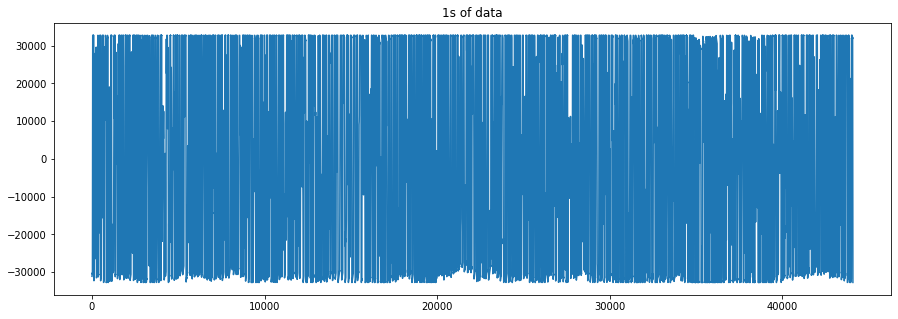

In [4]:
plt.figure(figsize=(15,5))
plt.plot(CH1[:FSample])
plt.title("1s of data")

### Conclusion: ca sature fort .. à voir si JF ne peut pas baisser le volume de sortie, pour éviter d'écreter les signaux ?

#  Verifions le spectrogramme

In [5]:
from scipy import signal
from scipy.fft import fftshift

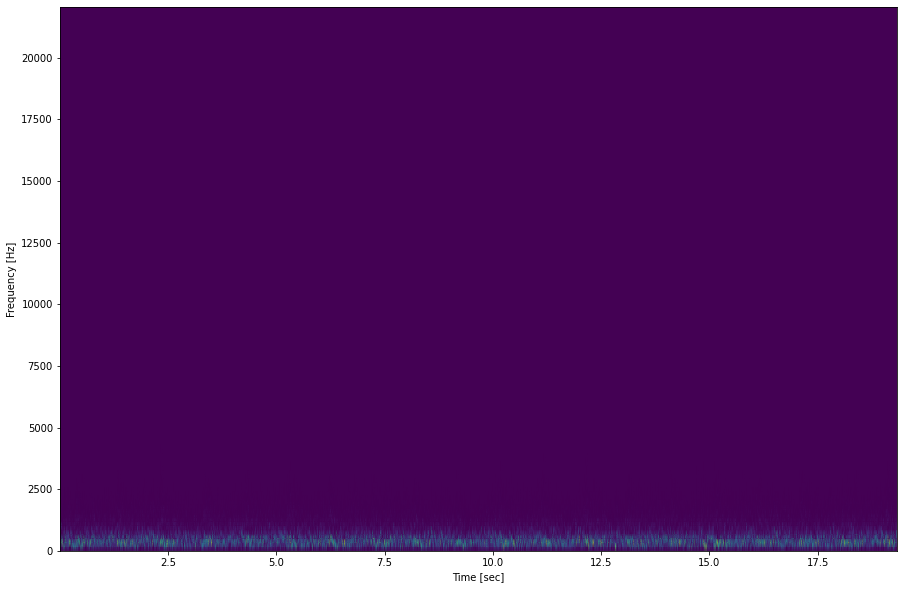

In [6]:
f, t, Sxx = signal.spectrogram(CH1, FSample)
plt.figure(figsize=(15,10))
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

### Zoom: le gros du doppler semble passer dans la zone < à 1kHz

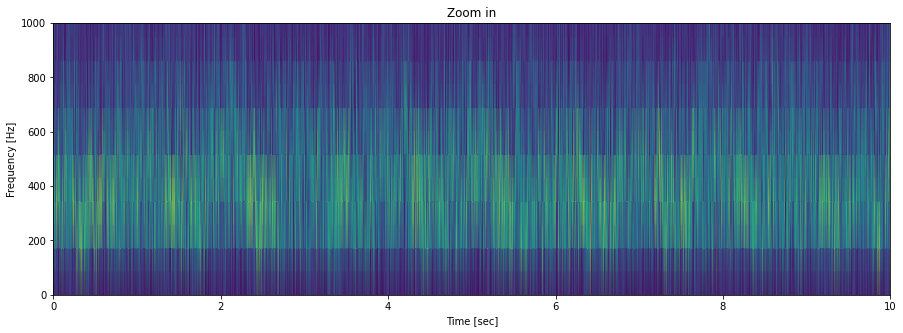

In [7]:
plt.figure(figsize=(15,5))
plt.pcolormesh(t, f, np.sqrt(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Zoom in")
axes = plt.gca()
axes.set_xlim([0,10])
axes.set_ylim([0,1000])
plt.show()



# Using another spectrogram

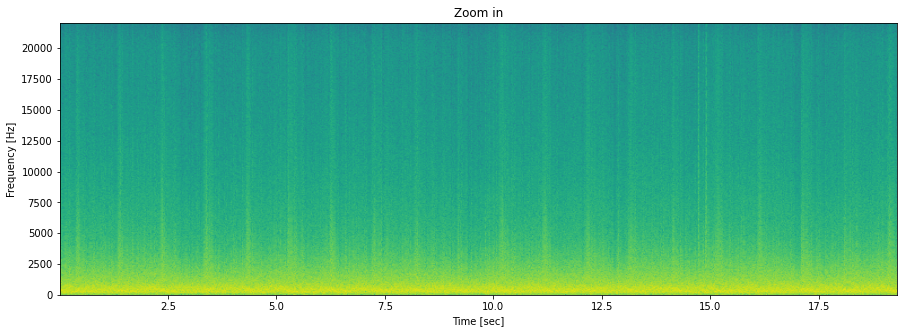

In [8]:
plt.figure(figsize=(15,5))
Pxx, freqs, bins, im = plt.specgram(CH1, NFFT=2*1024, Fs=FSample, noverlap=900)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Zoom in");

# Checking the content 

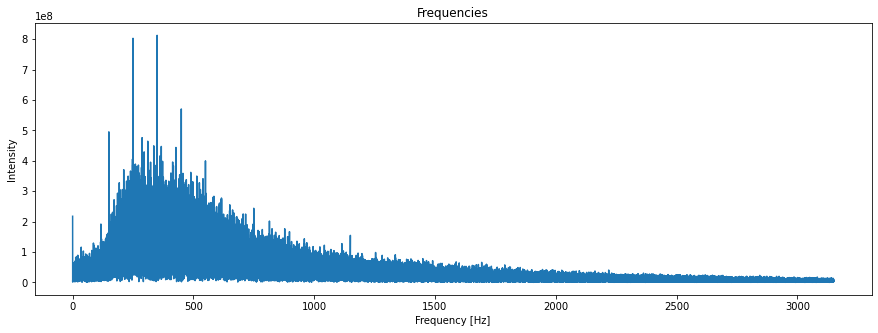

In [16]:
FFT = np.abs(np.fft.fft(CH1))
N = len(FFT)
f = [ FSample*x/N for x in range(N)]
plt.figure(figsize=(15,5))
plt.plot(f[:N//14],FFT[:N//14])

plt.xlabel('Frequency [Hz]')
plt.ylabel('Intensity')
plt.title("Frequencies");